**CIFAR-10**  is an established computer-vision dataset used for object recognition. It is a subset of the *80 million tiny images* dataset and consists of *60,000 32x32 color images* containing one of *10 object classes*, with *6000 images per class*. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

lets try to implement the latest research methods on [Rodrigo Benenson's classification results page](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html).

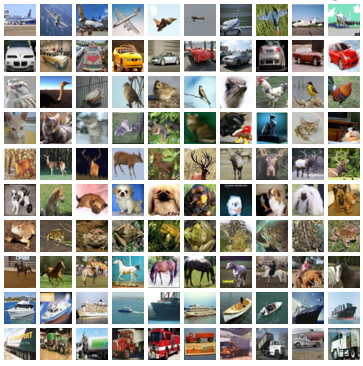

### **Problem Definition:**
Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

In [155]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [179]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

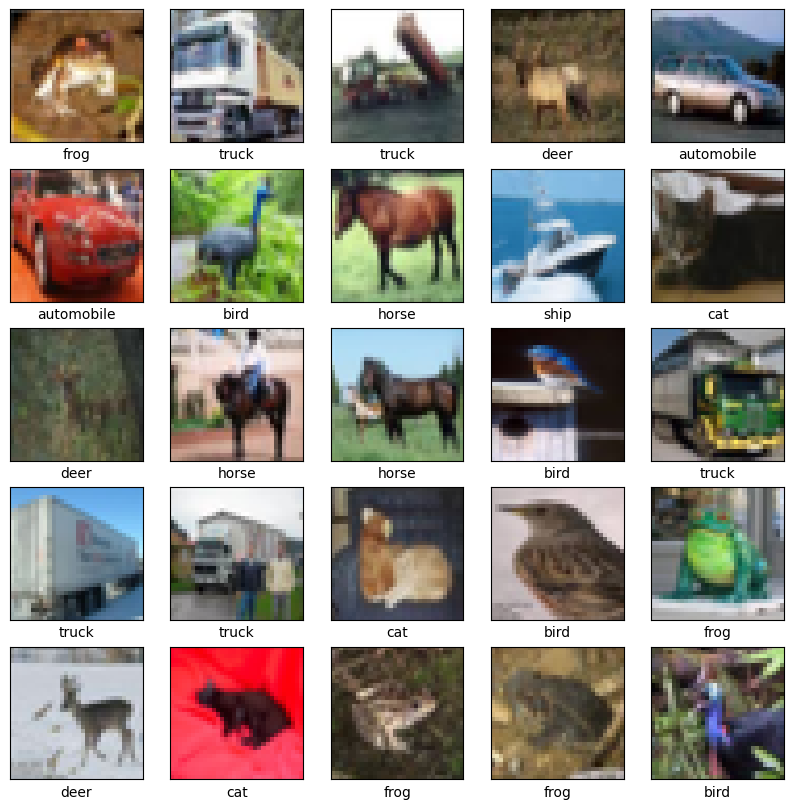

In [180]:
# Plot the first 25 images from the training set 
classnames = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classnames[train_labels[i][0]])

In [181]:
# Print shapes for debugging
print("Train images shape:", train_images.shape)  # Expected: (50000, 32, 32, 3)
print("Train labels shape:", train_labels.shape)  # Expected: (50000,)
print("Test images shape:", test_images.shape)    # Expected: (10000, 32, 32, 3)
print("Reshaped test labels shape:", test_labels.shape)  # Expected: (10000,)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Reshaped test labels shape: (10000, 1)


### **Data Preprocessing**

In [182]:
from tensorflow.keras.utils import to_categorical

# Normalize pixel values to be between 0 and 1
train_images,test_images = train_images/255.0,test_images/255.0
# Transform target variable into one-hotencoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

### **Model Implementation**

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

model=models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(32,32,3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(10,activation="softmax")

])

In [184]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [185]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [186]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_images, train_labels, batch_size=64)
steps_per_epoch = train_images.shape[0] // 64

In [187]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, baseline=0.88)

In [188]:
history = model.fit(train_images,train_labels,epochs=50, validation_data=(test_images,test_labels),callbacks=[early_stop],batch_size=32)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.4491 - loss: 1.5859 - precision: 0.5985 - recall: 0.2823 - val_accuracy: 0.6200 - val_loss: 1.0940 - val_precision: 0.7370 - val_recall: 0.4922
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6383 - loss: 1.0309 - precision: 0.7541 - recall: 0.5150 - val_accuracy: 0.6843 - val_loss: 0.9067 - val_precision: 0.7936 - val_recall: 0.5776
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6884 - loss: 0.8857 - precision: 0.7888 - recall: 0.5875 - val_accuracy: 0.6318 - val_loss: 1.0728 - val_precision: 0.7114 - val_recall: 0.5529
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7210 - loss: 0.7926 - precision: 0.8106 - recall: 0.6318 - val_accuracy: 0.7464 - val_loss: 0.7342 - val_precision: 0.8242 - val_recall: 0.6760
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7378 - loss: 0.7447 - precision: 0.8196 - recall: 0.6578 - val_accuracy: 0

In [199]:
# Save the model
model.save("cifar10_model.h5")

### **Model Evaluation**

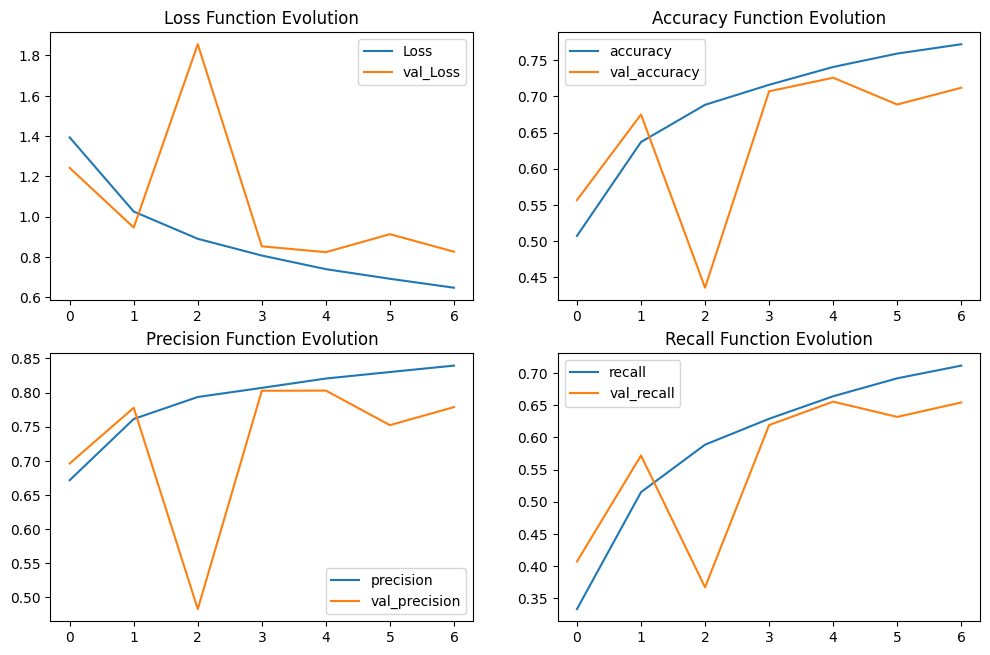

In [166]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [ ]:
test_results = model.evaluate(test_images, test_labels)
print('Test Accuracy =', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8100 - loss: 0.5906 - precision: 0.8429 - recall: 0.7811
Test Accuracy = 0.8029000163078308


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


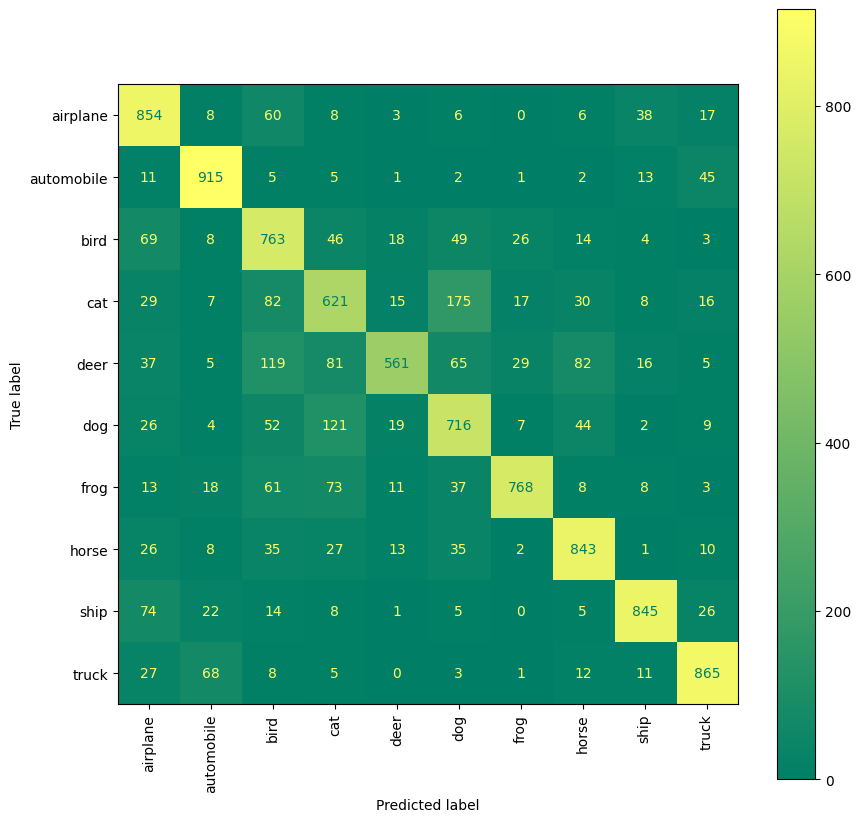

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

pred = model.predict(test_images)
pred = pred.argmax(axis=1)

cm = confusion_matrix(test_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

#### Test on one image

In [207]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred, target_names=labels))

              precision    recall  f1-score   support

    airplane       0.83      0.82      0.83      1000
  automobile       0.93      0.87      0.90      1000
        bird       0.73      0.71      0.72      1000
         cat       0.67      0.60      0.63      1000
        deer       0.75      0.81      0.78      1000
         dog       0.78      0.65      0.71      1000
        frog       0.82      0.88      0.85      1000
       horse       0.84      0.87      0.86      1000
        ship       0.85      0.91      0.88      1000
       truck       0.82      0.90      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



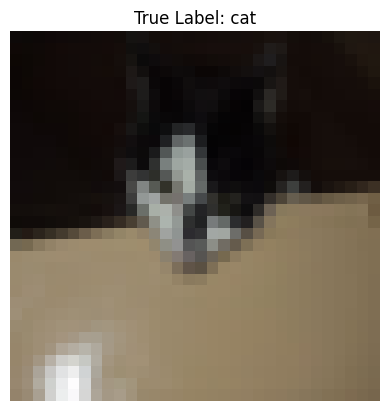

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The model predicts that the image is: cat


In [214]:
# Selecting a single image from the test set
my_image = test_images[121]
true_label_index = test_labels[121]

# Plotting the image
plt.imshow(my_image)
plt.title(f'True Label: {labels[true_label_index]}')  # Displaying the label name
plt.axis('off')
plt.show()

# Making a prediction for the image
predicted_label_index = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
predicted_label_name = labels[predicted_label_index]  # Getting the label name
print(f'The model predicts that the image is: {predicted_label_name}')

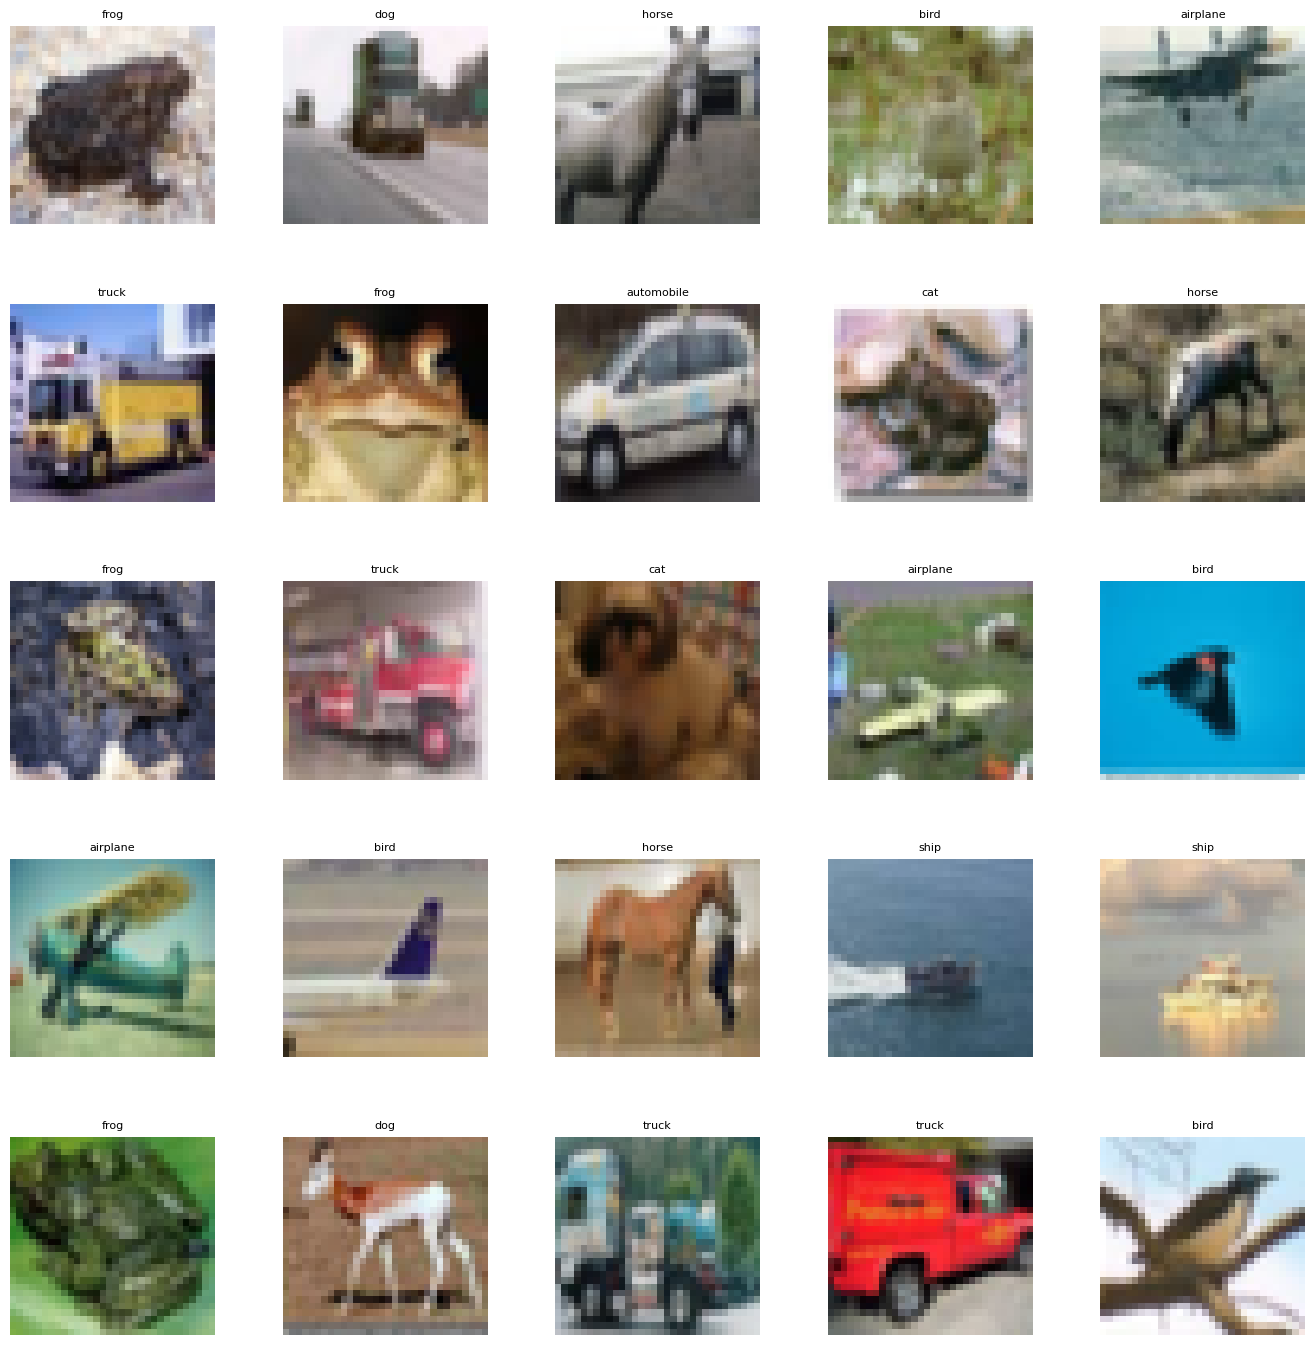

In [217]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(test_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(test_images[index,1:])
    label_index = int(pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [218]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


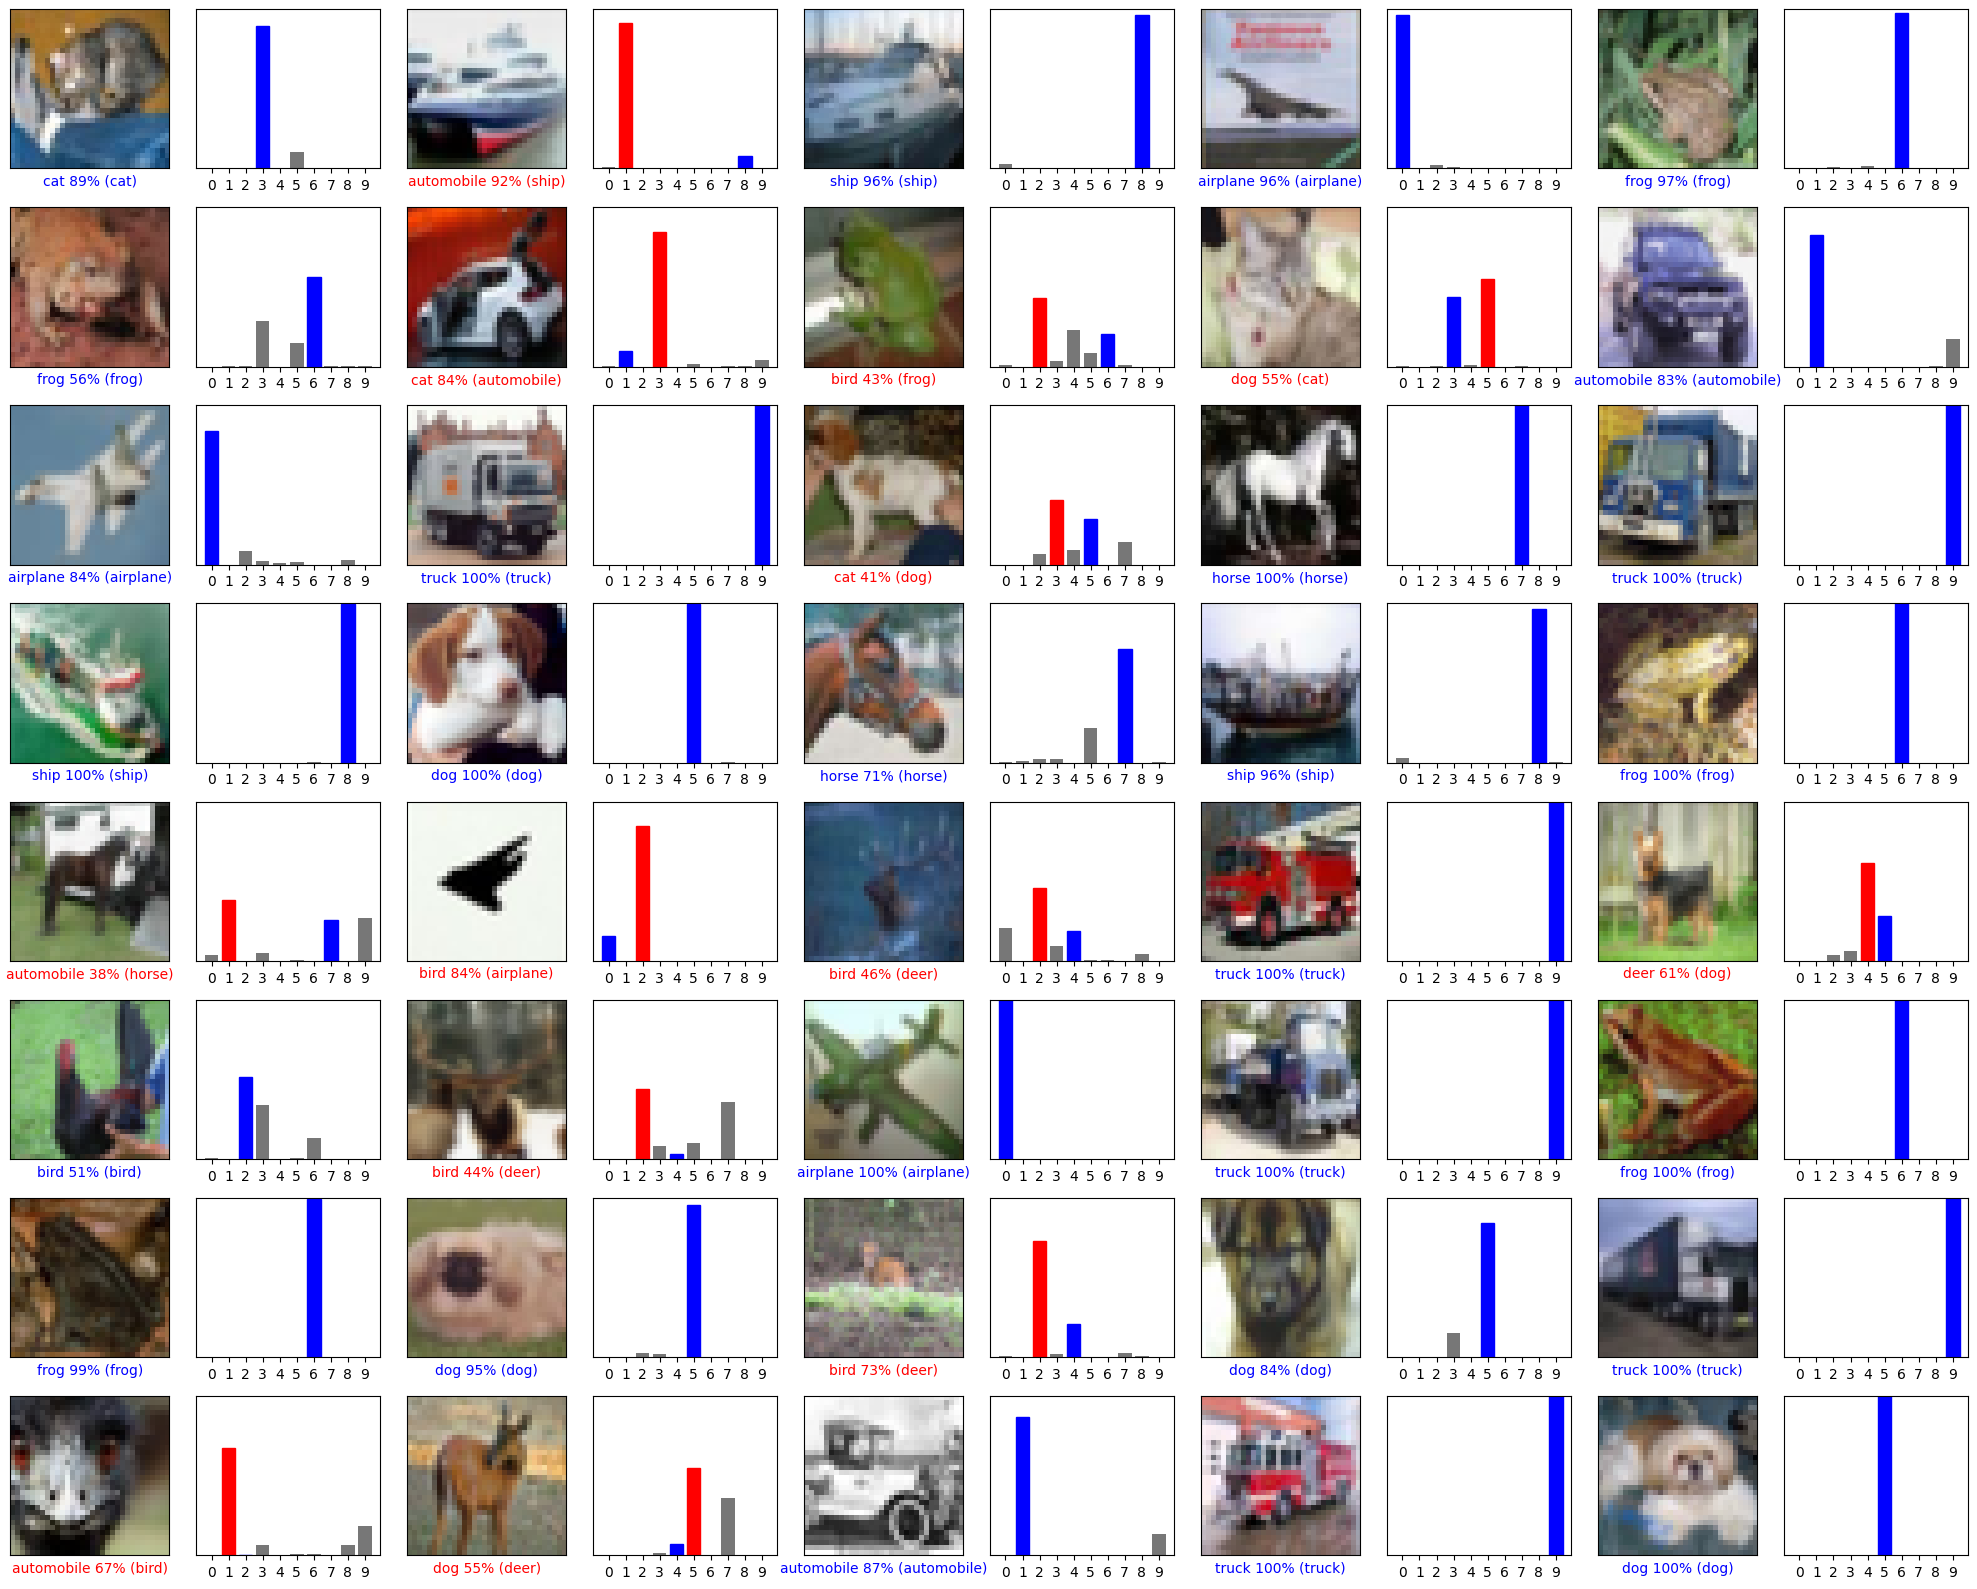

In [220]:
predictions = model.predict(test_images)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorr+ect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()